In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

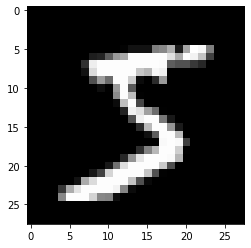

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
X_train = []
y_train = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    X_train.append(image)
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    y_train.append(label)
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set, X_test, y_test = [], [], []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    X_test.append(image)
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    y_test.append(label)
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

1) Feed Forward

In [125]:
def sigmoid(x) : 
  return 1 / (1 + np.exp(-x))

In [177]:
# Feed Forward Approach :
# 1) initializing necessary variables 
num_of_train_images = 100
input_neurons = 784
output_neurons = 10
hidden_layer_neurons = 16

# 2) initialize the weights and biases 
weight1 = np.random.normal(size = (hidden_layer_neurons, input_neurons))
weight2 = np.random.normal(size = (hidden_layer_neurons, hidden_layer_neurons))
weight3 = np.random.normal(size = (output_neurons, hidden_layer_neurons))
bias1 = np.zeros((16, 1))
bias2 = np.zeros((16, 1))
bias3 = np.zeros((10, 1))

# 3) find sigmoid of each layer
counter = 0 
for i in range(num_of_train_images) : 
    A0 = X_train[i].reshape(-1, 1)
    A1 = sigmoid(weight1 @ A0 + bias1)
    A2 = sigmoid(weight2 @ A1 + bias2)
    A3 = sigmoid(weight3 @ A2 + bias3)
    output_result = np.argmax(A3)
    # print(output_result)
#     print("result:", output_result)
    label = np.argmax(y_train[i], axis=0)
#     print(np.argmax(label))
    # print('label :', label)
    if output_result == label :
        counter += 1
# # 4) print the requested accuracy after feed forward
print(counter / num_of_train_images * 100)


4.0


2) Back Propagation

In [163]:
from datetime import datetime

In [178]:
# back propagation using the project description's pseudo code :

weight1 = np.random.normal(size = (hidden_layer_neurons, input_neurons))
weight2 = np.random.normal(size = (hidden_layer_neurons, hidden_layer_neurons))
weight3 = np.random.normal(size = (output_neurons, hidden_layer_neurons))
bias1 = np.zeros((16, 1))
bias2 = np.zeros((16, 1))
bias3 = np.zeros((10, 1))


learning_rate = 1
number_of_epochs = 20
batch_size = 10

total_cost = []
start = datetime.now()

for i in range(0, number_of_epochs) : 
  batches = [train_set[x : x + batch_size] for x in range(0, num_of_train_images, batch_size)]
  for batch in batches :

    gradient_weight1 = np.zeros((hidden_layer_neurons, input_neurons))
    gradient_weight2 = np.zeros((hidden_layer_neurons, hidden_layer_neurons))
    gradient_weight3 = np.zeros((output_neurons, hidden_layer_neurons))

    gradient_bias1 = np.zeros((16, 1))
    gradient_bias2 = np.zeros((16, 1))
    gradient_bias3 = np.zeros((10, 1))
    
    for img, lbl in batch :
      
      a1 = sigmoid(weight1 @ img + bias1)
      a2 = sigmoid(weight2 @ a1 + bias2)
      a3 = sigmoid(weight3 @ a2 + bias3)

      for j in range(gradient_weight3.shape[0]) : 
        for k in range(gradient_weight3.shape[1]) : 
          gradient_weight3[j, k] += 2 * (a3[j, 0] - lbl[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]

      for j in range(gradient_bias3.shape[0]):
          gradient_bias3[j, 0] += 2 * (a3[j, 0] - lbl[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            
      activation_2 = np.zeros((16, 1))
      for k in range(hidden_layer_neurons):
          for j in range(output_neurons):
                    activation_2[k, 0] += 2 * (a3[j, 0] - lbl[j, 0]) * a2[j, 0] * (1 - a2[j, 0]) * weight3[j, k]
            
            
      for k in range(gradient_weight2.shape[0]):
          for m in range(gradient_weight2.shape[1]):
                    gradient_weight2[k, m] += activation_2[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            
      for k in range(gradient_bias2.shape[0]):
          gradient_bias2[k, 0] += activation_2[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            
      activation_1 = np.zeros((16, 1))
      for m in range(hidden_layer_neurons):
          for k in range(hidden_layer_neurons):
                  activation_1[m, 0] += activation_2[k, 0] * a1[k, 0] * (1 - a1[k, 0]) * weight2[k, m]
            
           
      for m in range(gradient_weight1.shape[0]):
          for v in range(gradient_weight1.shape[1]):
                  gradient_weight1[m, v] += activation_1[m, 0] * a1[m,0] * (1 - a1[m, 0]) * img[v, 0]

            
      for m in range(gradient_bias1.shape[0]):
          gradient_bias1[m, 0] += activation_1[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
    weight3 = weight3 - (learning_rate * (gradient_weight3 / batch_size))
    weight2 = weight2 - (learning_rate * (gradient_weight2 / batch_size))
    weight1 = weight1 - (learning_rate * (gradient_weight1 / batch_size))
        
    bias3 = bias3 - (learning_rate * (gradient_bias3 / batch_size))
    bias2 = bias2 - (learning_rate * (gradient_bias2 / batch_size))
    bias1 = bias1 - (learning_rate * (gradient_bias1 / batch_size))
    
   
  cost = 0
  for train_data in train_set[:num_of_train_images]:
        a0 = train_data[0]
        # print(a0.shape)
        a1 = sigmoid(weight1 @ a0 + bias1)
        a2 = sigmoid(weight2 @ a1 + bias2)
        a3 = sigmoid(weight3 @ a2 + bias3)

        for j in range(output_neurons):
            cost += np.power((a3[j, 0] - train_data[1][j, 0]), 2)
            
  cost /= num_of_train_images
  total_cost.append(cost) 
    
# get the finish time
finish = datetime.now()      


60000
45
Accuracy: 45.0
Duration time:  0:01:24.867974


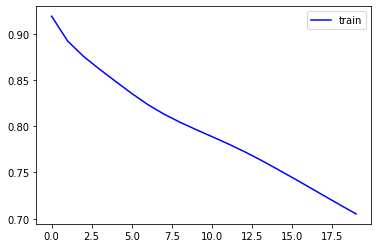

In [185]:
# show 
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_cost, '-b', label = 'train')
plt.legend()
# find accurancy
counter = 0
print(len(train_set))
for train_data in train_set[:num_of_train_images]:
    # counter += 1
    a0 = train_data[0]
    # if counter == 76:
    #   print(counter)
    #   show_image(train_data[0])
    a1 = sigmoid(weight1 @ a0 + bias1)
    a2 = sigmoid(weight2 @ a1 + bias2)
    a3 = sigmoid(weight3 @ a2 + bias3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(train_data[1] == np.amax(train_data[1]))

    if predicted == real:
        counter += 1
print(counter)
print("Accuracy:" , counter / num_of_train_images * 100)
print("Duration time: ", finish-start)

3) Vectorization

In [186]:
weight1 = np.random.normal(size = (hidden_layer_neurons, input_neurons))
weight2 = np.random.normal(size = (hidden_layer_neurons, hidden_layer_neurons))
weight3 = np.random.normal(size = (output_neurons, hidden_layer_neurons))
bias1 = np.zeros((16, 1))
bias2 = np.zeros((16, 1))
bias3 = np.zeros((10, 1))

total_cost = []
number_of_epochs = 200

start = datetime.now()

for i in range(number_of_epochs):
    
    batches = [train_set[x : x+batch_size] for x in range(0, num_of_train_images, batch_size)]
    
    for batch in batches:
        
        gradient_weight1 = np.zeros((hidden_layer_neurons, input_neurons))
        gradient_weight2 = np.zeros((hidden_layer_neurons, hidden_layer_neurons))
        gradient_weight3 = np.zeros((output_neurons, hidden_layer_neurons))
       
        gradient_bias1 = np.zeros((16, 1))
        gradient_bias2 = np.zeros((16, 1))
        gradient_bias3 = np.zeros((10, 1))
        
        for img, lbl in batch:
            
            a1 = sigmoid(weight1 @ img + bias1)
            a2 = sigmoid(weight2 @ a1 + bias2)
            a3 = sigmoid(weight3 @ a2 + bias3)
            
           
            gradient_weight3 += (2 * (a3 - lbl) * a3 * (1 - a3)) @ np.transpose(a2)
            
            
            gradient_bias3 += (2 * (a3 - lbl) * a3 * (1 - a3))
            
            
            activation_3 = np.zeros((16, 1))
            activation_3 += np.transpose(weight3) @ (2 *(a3 - lbl) * (a3 * (1 - a3)))
            
           
            gradient_weight2 += (a2 * (1 - a2) * activation_3) @ np.transpose(a1)
            
            
            gradient_bias2 += activation_3 * a2 * (1 - a2)
                    
           
            activation_2 = np.zeros((16, 1))
            activation_2 += np.transpose(weight2) @ activation_3 * a2 * (1 - a2)
            
          
            gradient_weight1 += (activation_2 * a1 * (1 - a1)) @ np.transpose(img)
                    
            
            gradient_bias1 += activation_2 * a1 * (1 - a1)
        
        weight3 = weight3 - (learning_rate * (gradient_weight3 / batch_size))
        weight2 = weight2 - (learning_rate * (gradient_weight2 / batch_size))
        weight1 = weight1 - (learning_rate * (gradient_weight1 / batch_size))
        
        bias3 = bias3 - (learning_rate * (gradient_bias3 / batch_size))
        bias2 = bias2 - (learning_rate * (gradient_bias2 / batch_size))
        bias1 = bias1 - (learning_rate * (gradient_bias1 / batch_size))
    
      # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:num_of_train_images]:
        a0 = train_data[0]
        a1 = sigmoid(weight1 @ a0 + bias1)
        a2 = sigmoid(weight2 @ a1 + bias2)
        a3 = sigmoid(weight3 @ a2 + bias3)

        for j in range(output_neurons):
            cost += np.power((a3[j, 0] - train_data[1][j , 0]), 2)
            
    cost /= num_of_train_images
    total_cost.append(cost)

# get the finish time
finish = datetime.now()  


Accuracy:  98.0 %
Duration time:  0:00:07.383278


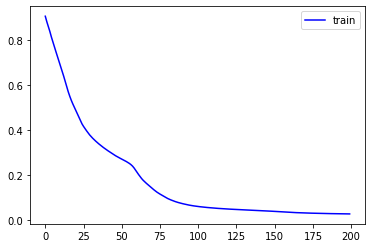

In [189]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_cost, '-b', label = 'train')
plt.legend()
correct = 0
for train_data in train_set[:num_of_train_images]:
    a0 = train_data[0]
    a1 = sigmoid(weight1 @ a0 + bias1)
    a2 = sigmoid(weight2 @ a1 + bias2)
    a3 = sigmoid(weight3 @ a2 + bias3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted == real:
        correct += 1
        
print('Accuracy: ',  correct / num_of_train_images * 100,"%")
print("Duration time: ", finish-start)

4) Testing The Model

In [190]:
W1 = np.random.normal(size=(hidden_layer_neurons,input_neurons))
W2 = np.random.normal(size=(hidden_layer_neurons, hidden_layer_neurons))
W3 = np.random.normal(size=(output_neurons, hidden_layer_neurons))
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

total_cost = []
batch_size = 50
learning_rate = 1
number_of_epochs = 5

# get the start time
start = datetime.now()

for i in range(number_of_epochs):
    np.random.shuffle(train_set)
    batches = [train_set[x : x+batch_size] for x in range(0, 60000, batch_size)]
    
    for batch in batches:
        
        gradient_weight1 = np.zeros((hidden_layer_neurons, input_neurons))
        gradient_weight2 = np.zeros((hidden_layer_neurons, hidden_layer_neurons))
        gradient_weight3 = np.zeros((output_neurons, hidden_layer_neurons))
       
        gradient_bias1 = np.zeros((16, 1))
        gradient_bias2 = np.zeros((16, 1))
        gradient_bias3 = np.zeros((10, 1))
        
        for img, lbl in batch:
            
            a1 = sigmoid(weight1 @ img + bias1)
            a2 = sigmoid(weight2 @ a1 + bias2)
            a3 = sigmoid(weight3 @ a2 + bias3)
            
           
            gradient_weight3 += (2 * (a3 - lbl) * a3 * (1 - a3)) @ np.transpose(a2)
            
            
            gradient_bias3 += (2 * (a3 - lbl) * a3 * (1 - a3))
            
            
            activation_3 = np.zeros((16, 1))
            activation_3 += np.transpose(weight3) @ (2 *(a3 - lbl) * (a3 * (1 - a3)))
            
           
            gradient_weight2 += (a2 * (1 - a2) * activation_3) @ np.transpose(a1)
            
            
            gradient_bias2 += activation_3 * a2 * (1 - a2)
                    
           
            activation_2 = np.zeros((16, 1))
            activation_2 += np.transpose(weight2) @ activation_3 * a2 * (1 - a2)
            
          
            gradient_weight1 += (activation_2 * a1 * (1 - a1)) @ np.transpose(img)
                    
            
            gradient_bias1 += activation_2 * a1 * (1 - a1)
        
        weight3 = weight3 - (learning_rate * (gradient_weight3 / batch_size))
        weight2 = weight2 - (learning_rate * (gradient_weight2 / batch_size))
        weight1 = weight1 - (learning_rate * (gradient_weight1 / batch_size))
        
        bias3 = bias3 - (learning_rate * (gradient_bias3 / batch_size))
        bias2 = bias2 - (learning_rate * (gradient_bias2 / batch_size))
        bias1 = bias1 - (learning_rate * (gradient_bias1 / batch_size))
    
      # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:60000]:
        a0 = train_data[0]
        a1 = sigmoid(weight1 @ a0 + bias1)
        a2 = sigmoid(weight2 @ a1 + bias2)
        a3 = sigmoid(weight3 @ a2 + bias3)

        for j in range(output_neurons):
            cost += np.power((a3[j, 0] - train_data[1][j , 0]), 2)
            
    cost /= 60000
    total_cost.append(cost)

# get the finish time
finish = datetime.now()  


Accuracy For Train Data: 89.82
Duration time:  0:01:54.438621


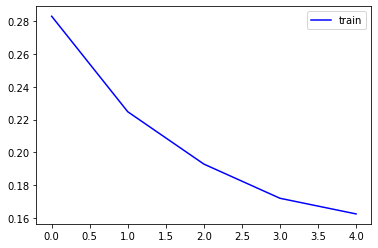

In [191]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_cost, '-b', label = 'train')
plt.legend()
correct = 0
for test_data in train_set[:60000]:
    a0 = test_data[0]
    a1 = sigmoid(weight1 @ a0 + bias1)
    a2 = sigmoid(weight2 @ a1 + bias2)
    a3 = sigmoid(weight3 @ a2 + bias3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted == real:
        correct += 1
        
print(f"Accuracy For Train Data: {correct/60000 *100 }")
print("Duration time: ", finish-start)

In [192]:
correct = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = sigmoid(weight1 @ a0 + bias1)
    a2 = sigmoid(weight2 @ a1 + bias2)
    a3 = sigmoid(weight3 @ a2 + bias3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted == real:
        correct += 1
print(f"Accuracy For Test Data: {correct/10000 *100 }")

Accuracy For Test Data: 89.63
